# Data Analysis of energy consumption for a single household  
Data can be downloaded from here: http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

In this dataset there is a total of 9 features and 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). The attributes for the features are as follows:

1. Date: Date in format dd/mm/yyyy
2. Time: time in format hh:mm:ss
3. Global_active_power: household global minute-averaged active power (in kilowatt)
4. Global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. Voltage: minute-averaged voltage (in volt)
6. Global_intensity: household global minute-averaged current intensity (in ampere)
7. Sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. Sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. Sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

some additional info:

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

## Exploratory data analysis
In this part we will perform EDA which includes:
1. Data cleaning and preprocessing.
2. Descriptive statistics
3. Data visualization
4. Correlation
5. Clustering
6. Feature engineering? - Maybe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# we notice in the txt file that missing values are registered with '?' 
df_energy_comp = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?')

In [4]:
df_energy_comp.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
df_energy_comp.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df_energy_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [7]:
df_energy_comp.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
# this is too slow 
df_energy_comp['DateTime'] = pd.to_datetime(df_energy_comp['Date']+ ' ' + df_energy_comp['Time'], dayfirst=False)

In [9]:
df_energy_comp.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [10]:
df_energy_comp.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
DateTime                 datetime64[ns]
dtype: object

In [11]:
df_energy_comp = df_energy_comp.drop(['Date', 'Time'], axis=1)

In [12]:
df_energy_comp = df_energy_comp.set_index('DateTime')

In [13]:
df_energy_comp

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [14]:
df_energy_comp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


Well ... This datetime manipulation could had been done much easier and faster :
1. Loading the data
2. handling missing data that was registered with '?' in the raw data, now becomes NaN values 
3. merging the date and time columns and indexing data by new date_time column (time-series).

In [42]:
energy_comp_df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', parse_dates=[['Date', 'Time']],
                              infer_datetime_format=True, index_col=0)

In [43]:
energy_comp_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [44]:
energy_comp_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [45]:
energy_comp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [46]:
energy_comp_df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [47]:
energy_comp_df[190495: 190505]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2007-04-28 00:19:00,0.490,0.202,235.02,2.2,0.0,0.0,0.0
2007-04-28 00:20:00,0.492,0.208,236.24,2.2,0.0,0.0,0.0
2007-04-28 00:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 00:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 00:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 00:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 00:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 00:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handling missing data
There are 3 types of missing data:  Missing completely at random (MCAR), Missing at random (MAR), and Missing not at random (MNAR).
When dealing with missing data there are in general 2 ways to approach it
1. To delete the rows or columns containing missing data.
2. To impute the missing data

We will first check whether it is appropriate to delete the missing data or not, and then we will briefly discuss some methods to impute the missing data. 

In [48]:
energy_comp_df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [49]:
print('total amount if missing data in percent:', 25979/2075259 * 100)

total amount if missing data in percent: 1.2518437457686005


I want to check if the missing values only occur as whole rows or not

In [50]:
# df.isnull().any(axis=1) returns a boolean array indicating whether each row contains at least one missing value 
# (True if missing, False otherwise)
energy_comp_df.isnull().any(axis=1).sum()

25979

As we observe, there are a total of 25979 rows with missing values and each feature has exactly 25979 missing values.
So there is not a bias towards a particular feature. 

Since all features have the same amount of missing values and they occur on the same rows, it suggests that the missing data is systematic and not missing at random. In other words, there may be a reason why those rows have missing values, such as a technical issue during data collection, and it is not a random occurrence. Furthermore, since all the features have missing values at exactly the same rows, then checking the correlation between features will not provide any additional information regarding the nature of the missing data or its potential impact on bias.

Under other circumstances we would probably check if the missing data affects important variables, and calculate the correlation between the missing values and other variables, to see if the missing values are highly correlated with important variables or not, which may suggest that the missing data is not missing completely at random and could have an impact on the analysis. 

NOTE: lack of correlation does not necessarily mean that the missing values are completely random, but rather that there is no obvious systematic relationship between the variables with missing values and other variables in the dataset.

In [51]:
import missingno as msno

<Axes: >

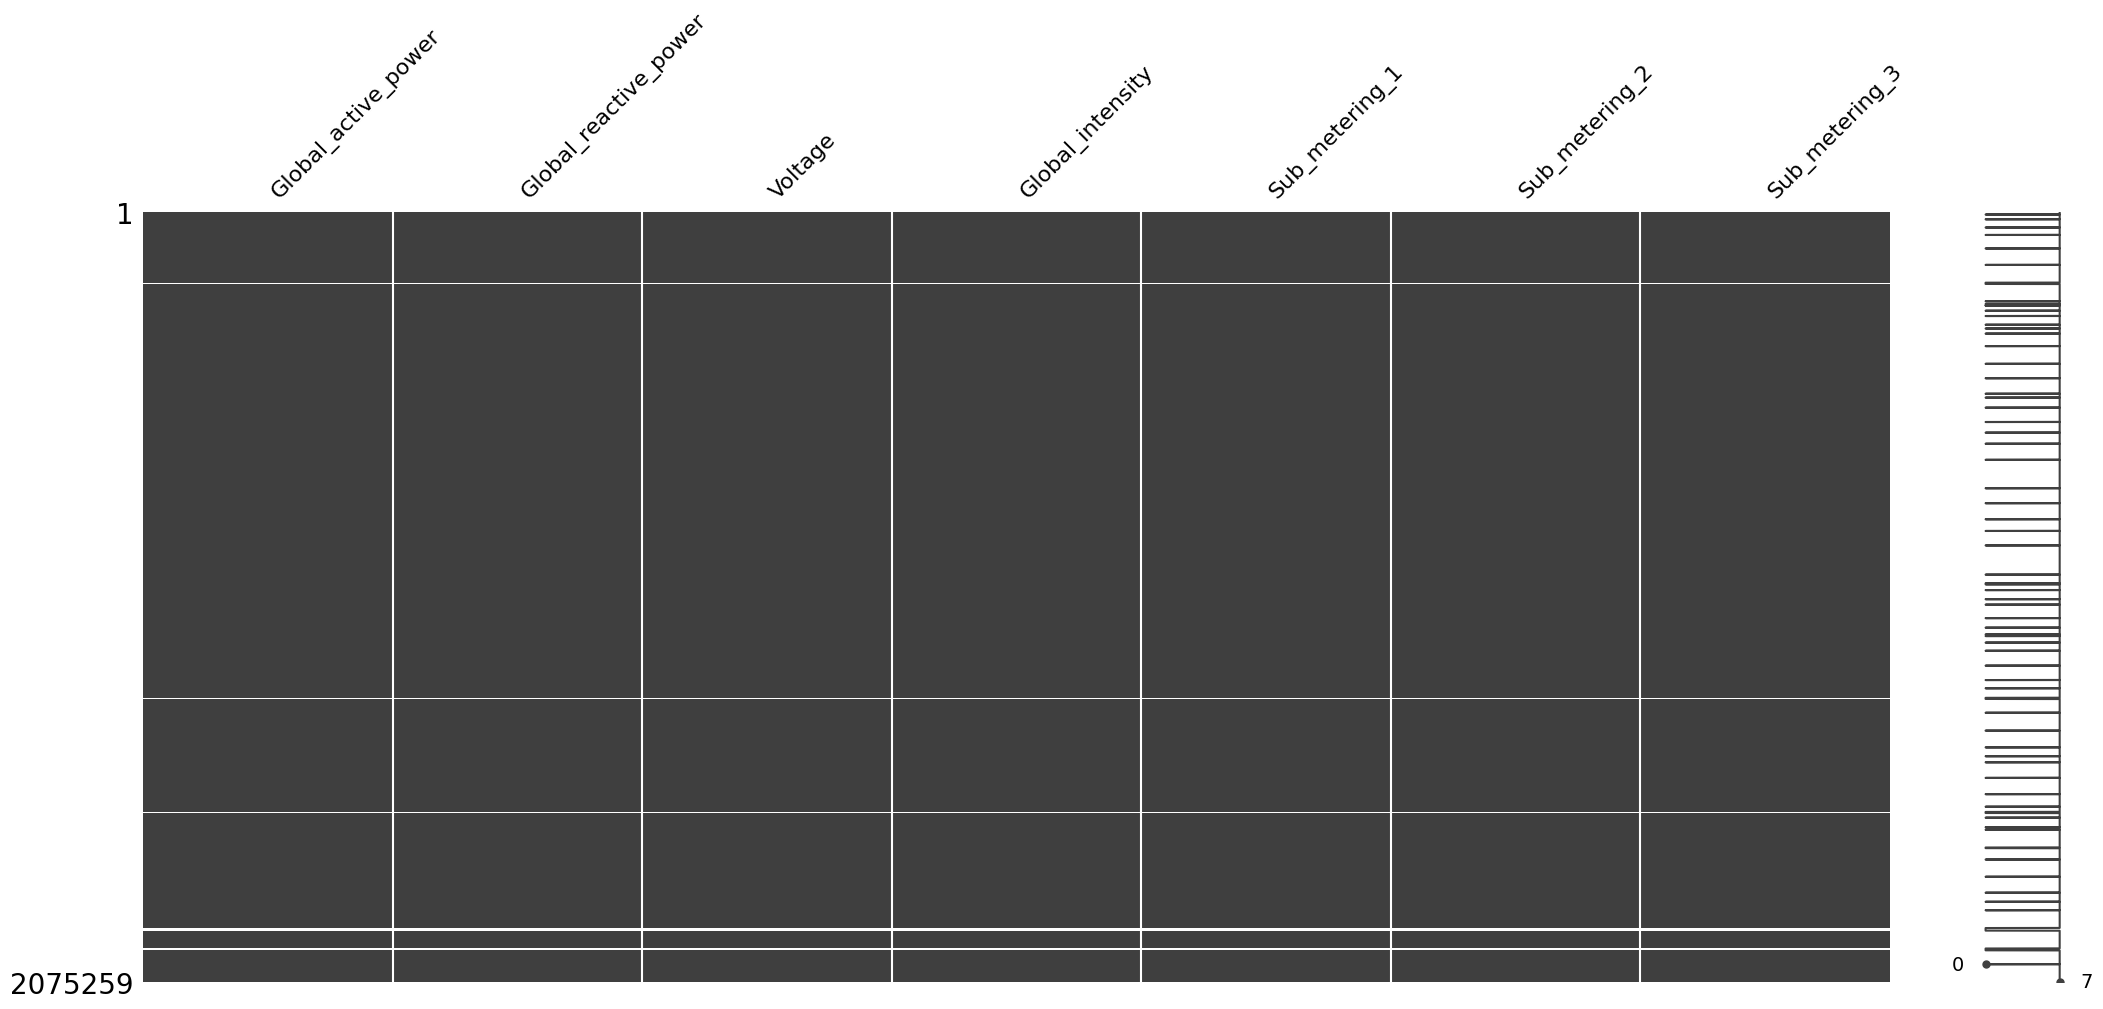

In [52]:
msno.matrix(energy_comp_df)

The bar plot on the left side shows the distribution of missing values across the columns of the DataFrame, where a white cell indicates that the data is missing, while a black cell indicates the data is present. We see that the missing values occur at the same rows for all features, but is only shows 5 instances of missing values, which is incorrect.

The right side is a sparkline plot, it shows the completeness of each row of the data, where the length of the sparkline represents the number of non-missing values in that row. So we see that there are alot more lines/steps here which depicts the missing data more accurately. It is hard to tell if there is any systematic reasons for the missing values when we look at the pattern of the missing data. 

If all the features have missing values at exactly the same rows,  then it is reasonable to conclude that the missing data is not MCAR and thus, it is not appropriate to delete the missing data without further analysis. It is important to consider why there is missing data and whether there are potential biases in the analysis that may arise from it. One approach in dealing with missing data in this scenario is to use imputation techniques, to name a few we have:
1. Forward filling or backward filling: In this method, the missing values are filled with the previous (forward filling) or next (backward filling) available value in the time series.
2. Mean/median imputation: Can be used for numerical data with MCAR or MAR missing data, but can be biased if data is not MCAR.
3. Interpolation: using the values of the surrounding data points to estimate the value of the missing data point. This method is used when the missing data point lies within the range of the available data points. There are several methods for interpolation, such as linear interpolation, spline interpolation, time interpolation,and polynomial interpolation.
4. Extrapolation: using the values of the available data points to estimate the value of the missing data point, even if it lies outside the range of the available data points. This method is used when the missing data point is outside the range of the available data points. However, it should be used with caution as it assumes that the data follows a certain pattern, and this assumption may not always hold true.
5. Model-based imputation: using statistical models such as ARIMA or Prophet to estimate the missing values based on the available data.
6. Statistical techniques: different types of moving averages can be used to impute missing values by aggregating the previous non-missing values. Other statistical techniques are Multiple imputation, MLE, EM-algorithm, mm.
7. Time based imputation: we impute the missing values using data from the same time period in previous years or months. For example, if we have missing values in april 2008, we can impute those missing values using the values from april 2007 or marts 2008.

Missing data can occur for different reasons, such as measurement errors, data entry errors, or missing by design. For our case, it is unclear why there are missing values, so it would be best to investigate furter, before deciding on a imputation method. If it is not possible to identify the reason for missing data or if it is suspected that the missing values are not missing at random, it might be better to remove the rows with missing values. 

To get a better view of where the missing data occurs in the whole dataset, we plot a barplot of the data for 'Global_active_power' and plot the missing data ontop of it.

In [53]:
energy_comp_df.index[energy_comp_df.isnull().any(axis=1)]

DatetimeIndex(['2006-12-21 11:23:00', '2006-12-21 11:24:00',
               '2006-12-30 10:08:00', '2006-12-30 10:09:00',
               '2007-01-14 18:36:00', '2007-01-28 17:13:00',
               '2007-02-22 22:58:00', '2007-02-22 22:59:00',
               '2007-03-25 17:52:00', '2007-04-28 00:21:00',
               ...
               '2010-09-28 19:04:00', '2010-09-28 19:05:00',
               '2010-09-28 19:06:00', '2010-09-28 19:07:00',
               '2010-09-28 19:08:00', '2010-09-28 19:09:00',
               '2010-09-28 19:10:00', '2010-09-28 19:11:00',
               '2010-09-28 19:12:00', '2010-10-24 15:35:00'],
              dtype='datetime64[ns]', name='Date_Time', length=25979, freq=None)

In [54]:
energy_comp_df[energy_comp_df.isna().any(axis=1)]['Global_active_power']


Date_Time
2006-12-21 11:23:00   NaN
2006-12-21 11:24:00   NaN
2006-12-30 10:08:00   NaN
2006-12-30 10:09:00   NaN
2007-01-14 18:36:00   NaN
                       ..
2010-09-28 19:09:00   NaN
2010-09-28 19:10:00   NaN
2010-09-28 19:11:00   NaN
2010-09-28 19:12:00   NaN
2010-10-24 15:35:00   NaN
Name: Global_active_power, Length: 25979, dtype: float64

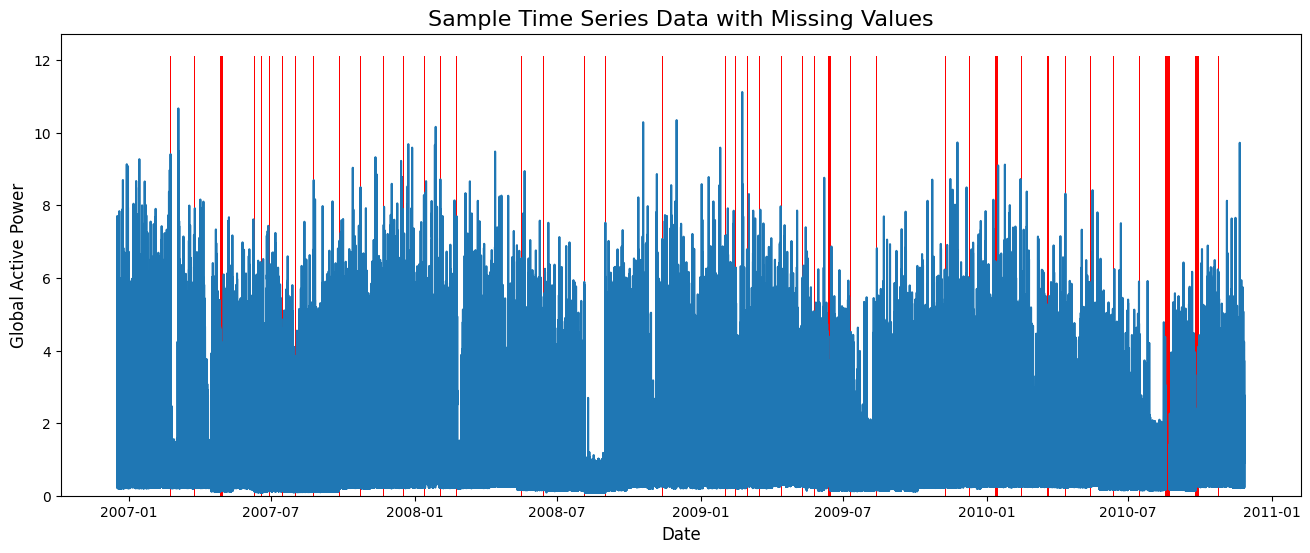

In [55]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(energy_comp_df.index, energy_comp_df['Global_active_power'])

# Plot the missing values on top of the time series plot
max_val_GAP = energy_comp_df['Global_active_power'].max(axis=0)
missing_dates = energy_comp_df[energy_comp_df.isna().any(axis=1)]['Global_active_power'].index
missing_values = energy_comp_df[energy_comp_df.isna().any(axis=1)]['Global_active_power'].fillna(max_val_GAP+1)
ax.bar(missing_dates, missing_values, color='red')

# Set plot title and axis labels
ax.set_title('Sample Time Series Data with Missing Values', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Global Active Power', fontsize=12)

plt.show()

From the plot I cannot see any obvious systematic structure for the missing data. To further check for missing data patterns we can calculate  the percentage of missing values for each month, each season of each year, and each year to see if there are any patterns or trends in the missing data. 

In [56]:
energy_comp_df.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Date_Time', length=2075259)

In [57]:
years = energy_comp_df.groupby(energy_comp_df.index.year)
years.count()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006,21992,21992,21992,21992,21992,21992,21992
2007,521669,521669,521669,521669,521669,521669,521669
2008,526905,526905,526905,526905,526905,526905,526905
2009,521320,521320,521320,521320,521320,521320,521320
2010,457394,457394,457394,457394,457394,457394,457394


In [58]:
for year, year_df in years:
    missing_val = year_df.isnull().sum().sum()
    total_val = year_df.shape[0] * year_df.shape[1]
    pct_missing = (missing_val / total_val) * 100
    print(f"Year {year}: {pct_missing:.2f}% missing values")

Year 2006: 0.02% missing values
Year 2007: 0.75% missing values
Year 2008: 0.03% missing values
Year 2009: 0.81% missing values
Year 2010: 3.71% missing values


Found out that there is a 'resample' function 

In [59]:
yearly_missing = energy_comp_df.resample('Y').apply(lambda x: x.isna().sum() / len(x))*100
yearly_missing

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-31,0.018185,0.018185,0.018185,0.018185,0.018185,0.018185,0.018185
2007-12-31,0.747907,0.747907,0.747907,0.747907,0.747907,0.747907,0.747907
2008-12-31,0.025615,0.025615,0.025615,0.025615,0.025615,0.025615,0.025615
2009-12-31,0.814307,0.814307,0.814307,0.814307,0.814307,0.814307,0.814307
2010-12-31,3.711189,3.711189,3.711189,3.711189,3.711189,3.711189,3.711189


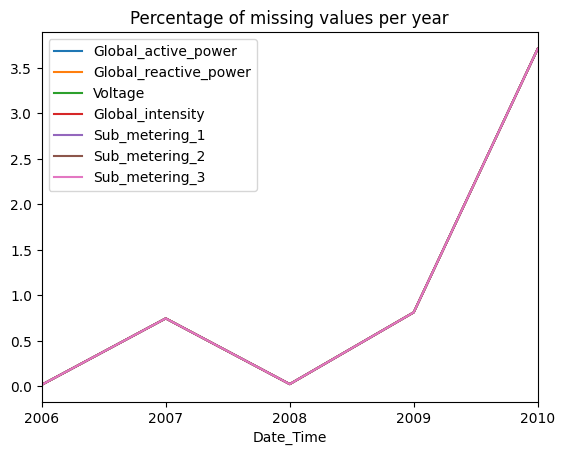

In [60]:
yearly_missing.plot()
plt.title('Percentage of missing values per year')
plt.show()

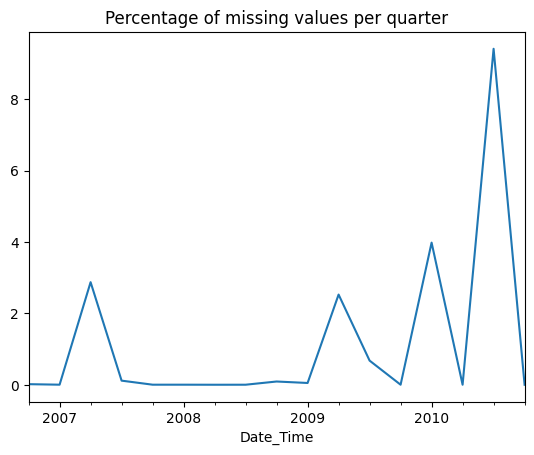

In [61]:
Quarter_missing = energy_comp_df['Global_active_power'].resample('Q').apply(lambda x: x.isna().sum() / len(x)) *100
Quarter_missing.plot()
plt.title('Percentage of missing values per quarter')
plt.show()

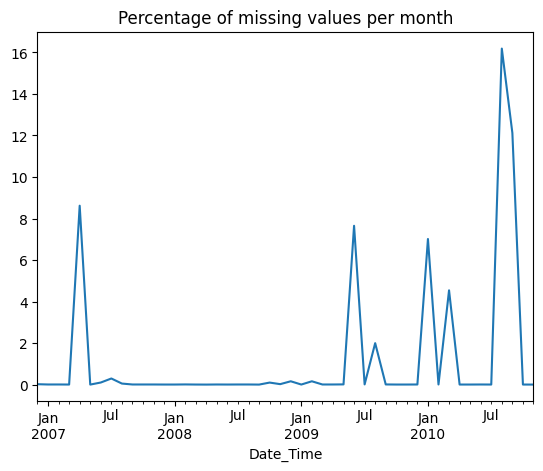

In [62]:
Monthly_missing = energy_comp_df['Global_active_power'].resample('M').apply(lambda x: x.isna().sum() / len(x)) *100
Monthly_missing.plot()
plt.title('Percentage of missing values per month')
plt.show()

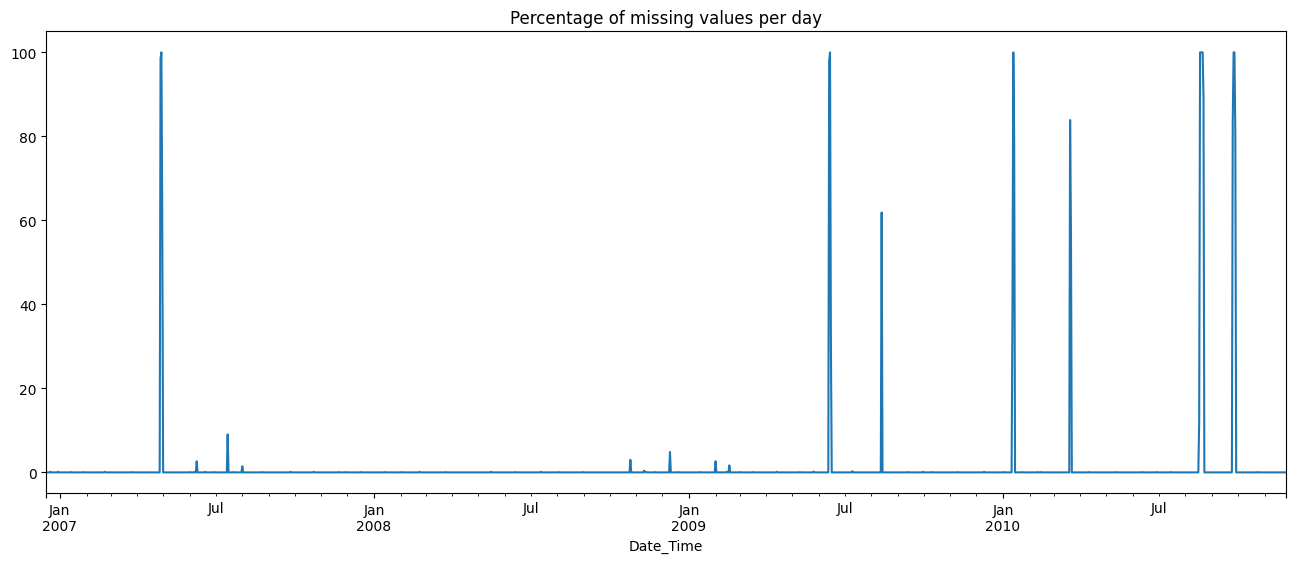

In [63]:
dayly_missing = energy_comp_df['Global_active_power'].resample('D').apply(lambda x: x.isna().sum() / len(x)) *100
dayly_missing.plot(figsize=(16, 6))
plt.title('Percentage of missing values per day')
plt.show()

This is further evidence for there is no obvious systematic structure. So it is reasonable to assume that the data are missing is systematically related to the observed but not the unobserved data. In other words, the fact that the missing data occurs as full rows for all features is systematic, but the affects is not caused by underlying factors/elements which isn't recorded. Thus making the assumption that the data is MAR reasonable.

Now, we need to handle MAR data. From what we discussed earlier, 
1. forward and backward filling are sensitive to the order of the missing data, making it not suitable for this data set
2. mean/median filling, very simple and computationally cheap, works well when the data has a relative stable distribution and the missing data are random, otherwise it could introduce bias. It works best with MCAR data, but also works with MAR data. We can, for example, check bias by compairing the distribution of the original and imputed data.
3. Interpolation: Over all it is a more precise method of filling in the missing data. Computation wise, linear and cubic is cheaper than spline and time-series
    1. Linear: computing the slope between two points and then using that slope to fill in missing values. It is simple and fast and preserves the overall trend, but if data is higly irregular it can result in unrealistic values, and it assumes linear relationship between the selected data points.
    2. cubic: fitting a third-degree polynomial between adjacent data points, then finds the coefficients of the cubic polynomial, by solving a system of equations using the four adjacent data points. More accurate and smooth than linear interpolation, and better at preversing overall trend. But false fluctuations/swings can occur if data is highly irregular. 
    3. Spline: fitting a series of cubic polynomials between adjacent data points, such that the resulting function is continuous and smooth. Then is chooses the function that minimizes the curvature, given that it passes through the data points. It is very smooth and accurate, and preserves the overall trend very well. But computationally expensive for large dataset.
    4. Time series: fitting a model to the time series data and using the model to estimate the missing values. Common models used for time-series interpolation include autoregressive models and moving average models. Can be more accurate since it takes into account the seasonality and trends. But it is complex and computationally expensive.
4. Extrapolation: it involves making predictions outside of our observed max-min values, so not a recommended method for our data.
5. Statistical techniques: regression imputation, MLE, EM-algorithm, and multiple imputation are computationally expensive. Unless the data is MNAR or smaller, these method is not that suited, because the tradeoff is not worth it.
6. Time-based imputation: Assumes MAR data and that the pattern observed in previous months or years will be similar in the present. It is sensitive to changes or trends that would make the data from previous years less relevant. This is suited for data where the patterns and trends repeat over time. For example, if our data repeats the energy comsumption patterns every year. In our case, we can see that there are smaller periods where the energy consumption is very low, this can be explained by that no one is home most of the day, and this happens randomly across the data, combined with the fact that the amount of missing data is low, and that over the 4 years there is only one large period where the energy consumption is extremely low, which makes me believe that this method is not best practice.

Next step would be to check if mean imputation introduces bias and compare it with linear and cubic interpolation.

In [64]:
df_missing = energy_comp_df.copy()

# Replace missing values with mean
df_imputed = df_missing.fillna(df_missing.mean())

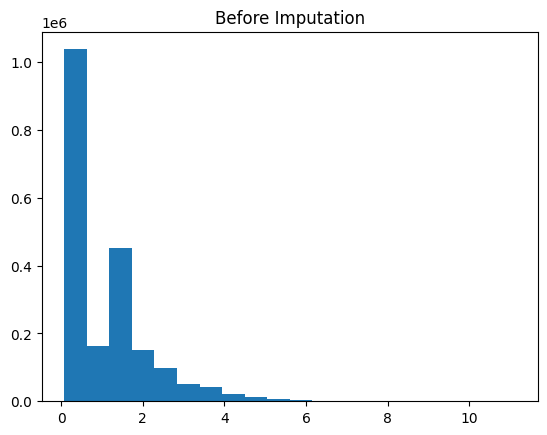

In [66]:
# Plot the distribution of the variable before imputation
plt.hist(df_missing['Global_active_power'], bins=20)
plt.title('Before Imputation')
plt.show()

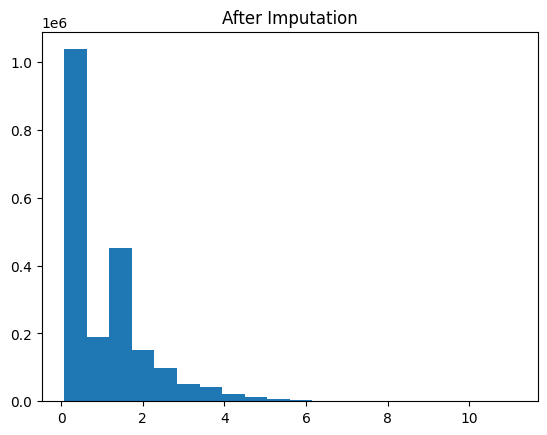

In [67]:
# Plot the distribution of the variable after imputation
plt.hist(df_imputed['Global_active_power'], bins=20)
plt.title('After Imputation')
plt.show()

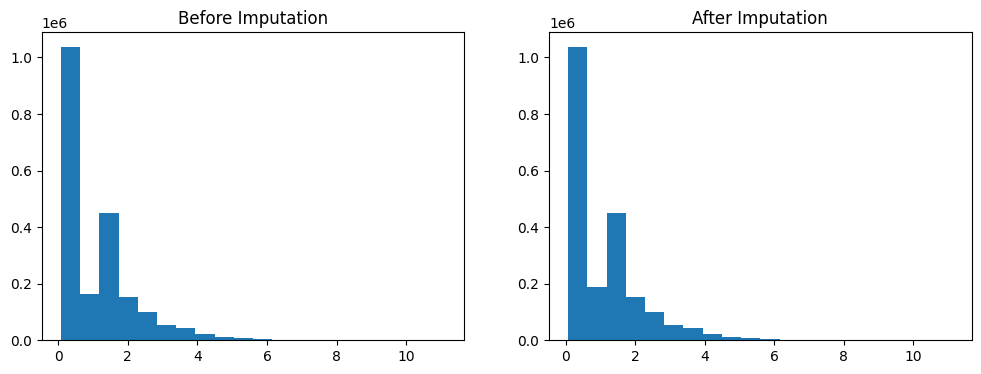

In [89]:
fig, axs = plt.subplots(1, 2, figsize = (12,4))
axs[0].hist(df_missing['Global_active_power'], bins=20)
axs[0].set_title('Before Imputation')

axs[1].hist(df_imputed['Global_active_power'], bins=20)
axs[1].set_title('After Imputation')
plt.show()

In [68]:
df_missing.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [80]:
df_imputed.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

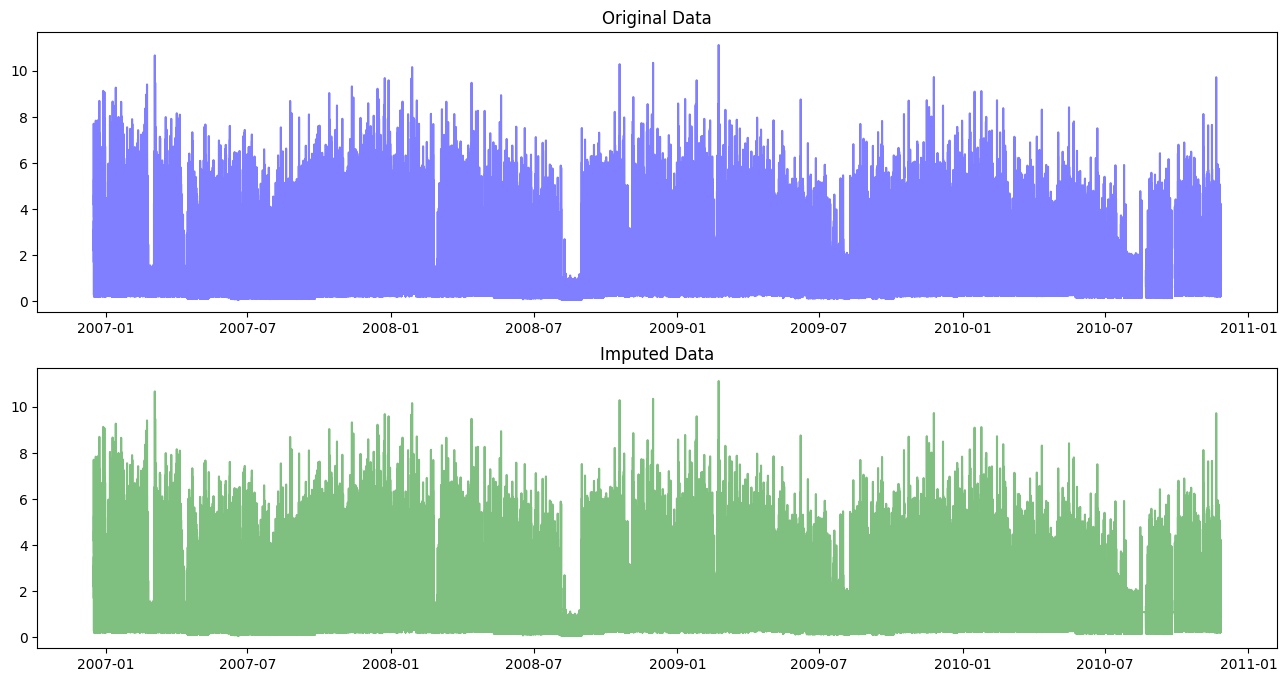

In [95]:
# Plot original data
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 8), sharey = True)

axes[0].plot(df_missing.index, df_missing['Global_active_power'], color = 'blue', alpha=0.5)
axes[0].set_title('Original Data')

# Plot imputed data

axes[1].plot(df_imputed.index, df_imputed['Global_active_power'], color = 'green', alpha=0.5)
axes[1].set_title('Imputed Data')

plt.show()